# Тема “Классификация текста”

Взять ноутбук colab_text_classification_part1.ipynb который разбирали на занятии и добавить пункты которые мы пропустили 

1. Посмотрите на токены если будут мусорные добавьте их в стоп слова и обучите заново

2. Проверьте изменилось ли качество при лемматизации/и без неё

3. Замените все токены которые принадлежат сущностям на их тег. Проверьте изменилось ли качество после этого

In [1]:
# !wget -O imdb.zip -qq --no-check-certificate "https://drive.google.com/uc?export=download&id=1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc"
# !unzip imdb.zip
# !pip -q install eli5
# !pip -q install spacy
# !python -m spacy download en

Archive:  imdb.zip
  inflating: test.tsv                
  inflating: train.tsv               
     |████████████████████████████████| 216 kB 8.3 MB/s 
     |████████████████████████████████| 133 kB 57.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 12.0 MB 6.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


# Классификация текстов

Начнём с самого простого - анализа тональности текста.

Будем классифицировать отзывы с IMDB на положительные/отрицательные.

Датасет взят с http://ai.stanford.edu/~amaas/data/sentiment/

In [3]:
# !head train.tsv

is_positive	review
0	"Dreamgirls, despite its fistful of Tony wins in an incredibly weak year on Broadway, has never been what one would call a jewel in the crown of stage musicals. However, that is not to say that in the right cinematic hands it could not be fleshed out and polished into something worthwhile on-screen. Unfortunately, what transfers to the screen is basically a slavishly faithful version of the stage hit with all of its inherent weaknesses intact. First, the score has never been one of the strong points of this production and the film does not change that factor. There are lots of songs (perhaps too many?), but few of them are especially memorable. The closest any come to catchy tunes are the title song and One Night Only - the much acclaimed And I Am Telling You That I Am Not Going is less a great song than it is a dramatic set piece for the character of Effie (Jennifer Hudson). The film is slick and technically well-produced, but the story and characters are surprisi

In [1]:
import pandas as pd

# Сброс ограничений на количество выводимых рядов
# pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
# pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
# pd.set_option('display.max_colwidth', None)

In [2]:
train_df = pd.read_csv("data/train.tsv", delimiter="\t")
test_df = pd.read_csv("data/test.tsv", delimiter="\t")

print('Train size = {}'.format(len(train_df)))
print('Test size = {}'.format(len(test_df)))

Train size = 25000
Test size = 25000


Посмотрите глазами на тексты? Какие есть зацепки, как определить, что это за сентимент?

Самое простое, как всегда - найти ключевые слова.

Test accuracy = 74.55%


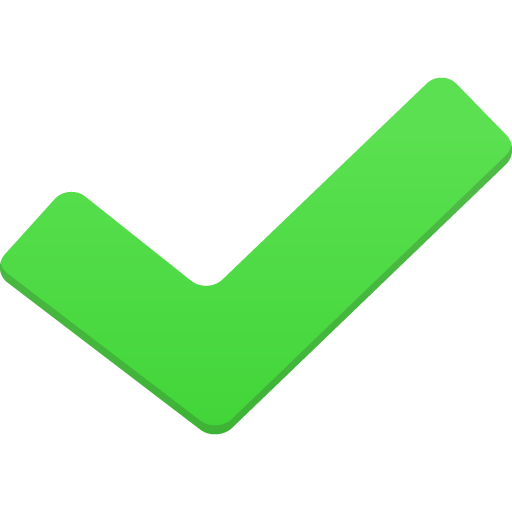

In [3]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'love', 'great', 'best', 'wonderful' #@param {type:"raw"}
negative_words = 'worst', 'awful', '1/10', 'crap' #@param {type:"raw"}


positive_words = ('love',  # 'любовь',
'10/10',
'9/10',
'8/10',
'7/10',
'great',  # 'большой',
'best',  # 'Лучший',
'wonderful',  #	'замечательно',
'amazing',  #'удивительно',
'powerful',  # 'мощный',
'excellent',  # 'превосходно',
'perfect',  # 'идеально',
'ideal',  # 'идеальный',
'brilliant',  # 'блестящий',
'incredible',  # 'невероятный',
'outstanding',  # 'выдающийся',
'funny',  # 'смешной',
'refreshing', # «освежающий»
'classic',  # классический
'unique',  # уникальный 
'lovely',  # прекрасный
# 'good', # хороший - понижает оценку
# 'worthy',  # достойный - понижает оценку
'modern'  # современный                  
)

negative_words = (
'1/10',
'2/10',
'3/10',
'4/10',
'worst', # 'худший',
'awful',  # 'ужасный',
'crap',  # 'дерьмо',
'shit',  # 'дерьмо',
'sucks',  # 'отстой',
'boring',  # 'скучный',
'trash',  # 'мусор',
'mediocre',  # 'посредственный',
'mess',  # 'беспорядок',
'bad',  # 'Плохо',
'awful',  # 'ужасный',
'worthless',  # «бесполезный»,
'stupid',  # 'глупый',
'banal',  # 'банальный',
'boring',  # 'скучный',
'fail',  # 'потерпеть неудачу',
'disgusting',  # 'отвратительный',
'hate',  # 'ненавидеть'
'crappy',  # дрянной
# 'poor'  # бедный - понижает оценку
# 'sinister'  # зловещий - понижает оценку
)

positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
is_positive = positives_count > negatives_count
correct_count = (is_positive == test_df.is_positive).values.sum()

accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    from IPython.display import Image, display
#     display(Image('https://s3.amazonaws.com/achgen360/t/rmmoZsub.png', width=500))
    display(Image('https://www.freeiconspng.com/uploads/success-icon-1.png', width=500))

    
    #     'https://i.pinimg.com/originals/4f/7d/20/4f7d20186cda70329fd299b16524104a.png'

In [4]:
negatives_count[negatives_count > 3].head()

22    9
32    4
33    4
60    5
66    5
Name: review, dtype: int64

In [9]:
ids = [22, 215, 1598, 2579, 3114] 
# test_df.iloc[ids]

In [6]:
positives_count[positives_count > 3].head()

4     11
11     4
28     5
74     4
75     5
Name: review, dtype: int64

In [7]:
ids = [4, 115, 597, 760] 
# test_df.iloc[ids]

**Задание** Придумайте хорошие ключевые слова или фразы и наберите хотя бы 71% точности на тесте (и не забудьте посмотреть на код классификации!)

**Задание** Кому-нибудь нравятся эти `<br /><br />`? Лично мне - нет. Напишите регулярку, которая будет их удалять

In [10]:
import re

pattern = re.compile('<br />')

print(train_df['review'].iloc[3])
print(pattern.subn(' ', train_df['review'].iloc[3])[0])

Spoilers ahead if you want to call them that...<br /><br />I would almost recommend this film just so people can truly see a 1/10. Where to begin, we'll start from the top...<br /><br />THE STORY: Don't believe the premise - the movie has nothing to do with abandoned cars, and people finially understanding what the mysterious happenings are. It's a draub, basic, go to cabin movie with no intensity or "effort".<br /><br />THE SCREENPLAY: I usually give credit to indie screenwriters, it's hard work when you are starting out...but this is crap. The story is flat - it leaves you emotionless the entire movie. The dialogue is extremely weak and predictable boasting lines of "Woah, you totally freaked me out" and "I was wondering if you'd uh...if you'd like to..uh, would you come to the cabin with me?". It makes me want to rip out all my hair, one strand at a time and feed it to myself.<br /><br />THE CHARACTERS: HOLY CRAP!!!! Some have described the characters as flat, I want to take it one 

Применим ее:

In [11]:
train_df['review'] = train_df['review'].apply(lambda text: pattern.subn(' ', text)[0])
test_df['review'] = test_df['review'].apply(lambda text: pattern.subn(' ', text)[0])

In [12]:
def replace_patern(text, patern, replace_letter=' '):
    """ 
    Заменим патерн на пробелы.
    """
    text = re.sub(patern, replace_letter, text) 

    return  text

In [13]:
train_df.iloc[1]

is_positive                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [14]:
train_df['review'] = train_df['review'].apply(replace_patern, patern = pattern)
test_df['review'] = test_df['review'].apply(replace_patern, patern = pattern)
train_df.iloc[1]

is_positive                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w\w+\b')

dummy_data = ['The movie was excellent',
              'the movie was awful']

dummy_matrix = vectorizer.fit_transform(dummy_data)

print(dummy_matrix.toarray())
print(vectorizer.get_feature_names())

[[0 1 1 1 1]
 [1 0 1 1 1]]
['awful', 'excellent', 'movie', 'the', 'was']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['review'].values)

CountVectorizer()

In [17]:
# Находим мусорные слова и включаем их в стоп-лист
# print(dummy_matrix.toarray())
# print(vectorizer.get_feature_names())
# vectorizer.get_feature_names()[1145:1300] 
stop_words = vectorizer.get_feature_names()[:1145]  # мусорные слова
# stop_words

In [18]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [19]:
vectorizer.transform([train_df['review'].iloc[3]])

<1x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 206 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

dummy_data = ['The movie was excellent',
              'the movie was awful']
dummy_labels = [1, 0]

vectorizer = CountVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(dummy_data, dummy_labels)

print(vectorizer.get_feature_names())
print(classifier.coef_)

['awful', 'excellent', 'movie', 'the', 'was']
[[-0.40104279  0.40104279  0.          0.          0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
model.fit(train_df['review'], train_df['is_positive'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [22]:
from sklearn.metrics import accuracy_score

def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    
eval_model(model, test_df)

Test accuracy = 86.54%


In [23]:
import eli5
eli5.show_weights(classifier, vec=vectorizer, top=40)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+1.876,refreshing
+1.778,wonderfully
+1.708,funniest
+1.663,surprisingly
+1.640,rare
+1.436,superb
+1.396,excellent
+1.374,incredible
+1.337,perfect
+1.315,delightful


In [25]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


Примеры неправильной классификации:

In [27]:
import numpy as np

preds = model.predict(test_df['review'])
incorrect_pred_index = np.random.choice(np.where(preds != test_df['is_positive'])[0])

eli5.show_prediction(classifier, test_df['review'].iloc[incorrect_pred_index],
                     vec=vectorizer, targets=['positive'], target_names=['negative', 'positive'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Пора переходить к машинке!

Как будем представлять текст? Проще всего - мешком слов.

Заведём большой-большой словарь - список всех слов в обучающей выборке. Тогда каждое предложение можно представить в виде вектора, в котором будет записано, сколько раз встретилось каждое из возможных слов:

![bow](https://raw.githubusercontent.com/DanAnastasyev/DeepNLP-Course/master/Week%2001/Images/BOW.png)

Простой и приятный способ сделать это - запихнуть тексты в `CountVectorizer`.

Он имеет такую сигнатуру:

```python
CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern=r'(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64'>)
```

Для начала обратим внимание на параметры `lowercase=True` и `max_df=1.0, min_df=1, max_features=None` - они про то, что по умолчанию все слова будут приводиться к нижнему регистру и в словарь попадут все слова, встречавшиеся в текстах.

При желании можно было бы убрать слишком редкие или слишком частотные слова - пока не будем этого делать.

Посмотрим на простом примере, как он будет работать:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dummy_data = ['The movie was excellent',
              'the movie was awful']

dummy_matrix = vectorizer.fit_transform(dummy_data)

print(dummy_matrix.toarray())
print(vectorizer.get_feature_names())

[[0 1 1 1 1]
 [1 0 1 1 1]]
['awful', 'excellent', 'movie', 'the', 'was']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


*Как именно vectorizer определяет границы слов? Обратите внимание на параметр `token_pattern=r'(?u)\b\w\w+\b'` - как он будет работать?*

Запустим его на реальных данных:

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['review'].values)

CountVectorizer()

Посмотрим на слова, попавшие в словарь:

In [30]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

Попробуем кого-нибудь таки сконвертировать

In [31]:
vectorizer.transform([train_df['review'].iloc[3]])

<1x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 206 stored elements in Compressed Sparse Row format>

То, что и хотели - вектор с bow (т.е. bag-of-words) представлением исходного текста.

И чем эта информация может помочь? Ну, всё тем же - какие-то слова носят положительный окрас, какие-то - отрицательный. Большинство вообще нейтральный, да.

![bow with weights](https://github.com/DanAnastasyev/DeepNLP-Course/raw/master/Week%2001/Images/BOW_weights.png)

Хочется, наверное, подобрать коэффициенты, которые будут определять уровень окраса, да? Подбирать нужно по обучающей выборке, а не как мы перед этим делали.

Например, для выборки
```
1   The movie was excellent
0   the movie was awful
```
легко подобрать коэффициенты на глазок: что-нибудь вроде `+1` для `excellent`,  `-1` для `awful` и по нулям всем остальным.

Построим линейную модель, которая станет этим заниматься. Она будет учиться строить разделяющую гиперплоскость в пространстве bow-векторов.

Проверим, как справится логистическая регрессия с нашей супер-выборкой из пары предложений

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

dummy_data = ['The movie was excellent',
              'the movie was awful']
dummy_labels = [1, 0]

vectorizer = CountVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(dummy_data, dummy_labels)

print(vectorizer.get_feature_names())
print(classifier.coef_)

['awful', 'excellent', 'movie', 'the', 'was']
[[-0.40104279  0.40104279  0.          0.          0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Получилось что надо.

Запустим теперь её на реальных данных.

In [33]:
model.fit(train_df['review'], train_df['is_positive'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [14]:
from sklearn.metrics import accuracy_score

def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    
eval_model(model, test_df)

Test accuracy = 86.50%


# 
# <font color='red'>1. Посмотрите на токены если будут мусорные добавьте их в стоп слова и обучите заново</font>

In [38]:
stop_words[:10]

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007']

In [40]:
vectorizer = CountVectorizer(stop_words=stop_words)
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])
# print(vectorizer.get_feature_names())
# print(classifier.coef_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['00', '000', '0000000000001',
                                             '00001', '00015', '000s', '001',
                                             '003830', '006', '007', '0079',
                                             '0080', '0083', '0093638', '00am',
                                             '00pm', '00s', '01', '01pm', '02',
                                             '020410', '029', '03', '04', '041',
                                             '05', '050', '06', '06th', '07', ...])),
                ('classifier', LogisticRegression())])

In [42]:
eval_model(model, test_df)

Test accuracy = 86.81%


__Без использования stop_words:__<br>
Test accuracy = 86.50%

__C использованием stop_words:__<br>
Test accuracy = 86.81%


# 

Прогресс!

Хочется как-то посмотреть, что заинтересовало классификатор. К счастью, сделать это совсем просто:

In [15]:
import eli5
eli5.show_weights(classifier, vec=vectorizer, top=40)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+1.855,refreshing
+1.760,wonderfully
+1.689,funniest
+1.647,surprisingly
+1.626,rare
+1.432,superb
+1.401,excellent
+1.365,incredible
+1.351,perfect
+1.302,delightful


Посмотрим на конкретные примеры его работы:

In [43]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
print('Positive' if test_df['is_positive'].iloc[6] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[6], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Negative


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Посмотрим на примеры неправильной классификации, наконец:

In [45]:
import numpy as np

preds = model.predict(test_df['review'])
incorrect_pred_index = np.random.choice(np.where(preds != test_df['is_positive'])[0])

eli5.show_prediction(classifier, test_df['review'].iloc[incorrect_pred_index],
                     vec=vectorizer, targets=['positive'], target_names=['negative', 'positive'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Придумываем новые признаки

### Tf-idf

Сейчас мы на все слова смотрим с одинаковым весом - хотя какие-то из них более редкие, какие-то более частые, и эта частотность - полезная, вообще говоря, информация.

Самый простой способ добавить статистическую информацию о частотностях - сделать *tf-idf* взвешивание:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \times \text{idf}(t)$$

*tf* - term-frequency - частотность слова `t` в конкретном документе `d` (рецензии в нашем случае). Это ровно то, что мы уже считали.

*idf* - inverse document-frequency - коэффициент, который тем больше, чем в меньшем числе документов встречалось данное слово. Считается как-нибудь так:
$$\text{idf}(t) = \text{log}\frac{1 + n_d}{1 + n_{d(t)}} + 1$$
где $n_d$ - число всех документов, а $n_{d(t)}$ - число документов со словом `t`.

Использовать его просто - нужно заменить `CountVectorizer` на `TfidfVectorizer`.

**Задание** Попробуйте запустить `TfidfVectorizer`. Посмотрите на ошибки, которые он научился исправлять, и на ошибки, которые он начал делать - по сравнению с `CountVectorizer`.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words)
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.29%


### N-граммы слов

До сих пор мы смотрели на тексты как на мешок слов - но очевидно, что есть разница между `good movie` и `not good movie`.

Добавим информацию (хоть какую-то) о последовательностях слов - будем извлекать еще и биграммы слов.

В Vectorizer'ах для этого есть параметр `ngram_range=(n_1, n_2)` - он говорит, что нужны n_1-...n_2-граммы.

**Задание** Попробуйте увеличенный range и поинтерпретируйте полученный результат.

In [55]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words, min_df = 0.002, max_df = 0.95)
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 89.65%


### Удалось добиться увеличения accuracy с 88.64% до 89.65%
# 

### N-граммы символов

Символьные n-граммы дают простой способ выучить полезные корни и суффиксы, не связываясь с этой вашей лингвистикой - только статистика, только хардкор.

Например, слово `badass` мы можем представить в виде такой последовательности триграмм:

`##b #ba bad ada das ass ss# s##`

So interpretable, неправда ли?

Реализовать это дело всё так же просто - нужно поставить `analyzer='char'` в вашем любимом Vectorizer'е и выбрать размер `ngram_range`.

**Задание** Запилите классификатор на n-граммах символов и визуализируйте его.

In [56]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char', stop_words=stop_words)
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy = 87.86%


In [57]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Подключаем лингвистику

### Лемматизация и стемминг

Если присмотреться, можно найти формы одного слова с разной семантической окраской по мнению классификатора. Или нет?

**Задание** Найти формы слова с разной семантической окраской.

Поверя, что они есть, попробуем что-нибудь с этим сделать.

Например, лемматизируем - сведем к начальной форме все слова. Поможет в этом библиотека spacy.

In [71]:
# !python -m spacy download en
# !python -m spacy link en_core_web_sm en
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz --no-deps

In [69]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm', disable=['parser'])
# nlp = spacy.load('en', disable=['parser'])

docs = [doc for doc in nlp.pipe(train_df.review.values[:50])]

In [70]:
for token in docs[0]:
    print(token.text, token.lemma_, token.ent_iob_, token.ent_type_)

Dreamgirls dreamgirl O 
, , O 
despite despite O 
its its O 
fistful fistful O 
of of O 
Tony Tony B PERSON
wins win O 
in in O 
an an B DATE
incredibly incredibly I DATE
weak weak I DATE
year year I DATE
on on O 
Broadway Broadway B FAC
, , O 
has have O 
never never O 
been be O 
what what O 
one one O 
would would O 
call call O 
a a O 
jewel jewel O 
in in O 
the the O 
crown crown O 
of of O 
stage stage O 
musicals musical O 
. . O 
However however O 
, , O 
that that O 
is be O 
not not O 
to to O 
say say O 
that that O 
in in O 
the the O 
right right O 
cinematic cinematic O 
hands hand O 
it it O 
could could O 
not not O 
be be O 
fleshed flesh O 
out out O 
and and O 
polished polish O 
into into O 
something something O 
worthwhile worthwhile O 
on on O 
- - O 
screen screen O 
. . O 
Unfortunately unfortunately O 
, , O 
what what O 
transfers transfer O 
to to O 
the the O 
screen screen O 
is be O 
basically basically O 
a a O 
slavishly slavishly O 
faithful faithful 

immediately immediately O 
makes make O 
any any O 
behavior behavior O 
excusable excusable O 
. . O 
Indeed indeed O 
the the O 
only only O 
big big O 
effort effort O 
the the O 
film film O 
makes make O 
to to O 
show show O 
Effie Effie B ORG
's 's O 
mothering mothering O 
is be O 
to to O 
tell tell O 
us we O 
about about O 
it it O 
and and O 
then then O 
include include O 
a a O 
scene scene O 
where where O 
she she O 
barks bark O 
at at O 
her her O 
daughter daughter O 
in in O 
the the O 
unemployment unemployment O 
office office O 
, , O 
insists insist O 
that that O 
the the O 
girl girl O 
has have O 
" " O 
no no O 
father father O 
" " O 
and and O 
then then O 
refuse refuse O 
to to O 
look look O 
for for O 
gainful gainful O 
employment employment O 
to to O 
support support O 
them they O 
since since O 
singing singe O 
is be O 
all all O 
she she O 
knows know O 
. . O 
In in O 
the the O 
hands hand O 
of of O 
a a O 
skillful skillful O 
actress actres

2. Проверьте изменилось ли качество при лемматизации/и без неё

In [82]:
# стоп-слова
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) + stop_words

print(stopwords)

['for', '’ve', 'eleven', 'third', 'then', 'name', 'namely', 'though', 'be', 'while', "'d", 'even', 'either', 'myself', 'when', 'there', 'since', 'himself', 'we', 'herein', 'where', 'my', 'this', 'being', 'against', 'could', 'yet', 'but', 'own', 'further', 'take', 'make', 'anything', 'with', 'had', 'serious', 'somehow', 'seeming', 'call', 'well', 'i', 'same', 'it', 'whereby', 'various', 'meanwhile', 'whoever', 'alone', 'until', 'always', 'hence', 'both', 'front', 'of', 'ten', 'anyone', '‘ll', 'wherever', 'why', 'only', 'cannot', 'go', '’d', 'forty', 'as', "'ll", 'twenty', 'out', 'which', 'except', '’ll', 'elsewhere', 'were', 'already', 'really', 'whence', "'m", 'seem', 'his', 'six', 'whatever', 'other', 'none', 'that', 'thereby', 'without', 'one', 'done', 'rather', 'keep', 'he', 'above', 'still', 'enough', 'fifteen', 'over', 'who', 'some', 'sixty', 'here', 'move', 'among', 'again', 'anyway', 'much', 'or', 'these', 'twelve', 'its', 'most', 'between', 'part', 'hundred', 'someone', 'fifty'

In [76]:
# Python spacy.tokens.Token() Examples - https://www.programcreek.com/python/example/114357/spacy.tokens.Token

def print_token(token):
    '''
    Print the important of a token
    @token: Token
    '''
    print('[token]')
    print('id\t%d' % token.i)
    print('text\t%s' % token.text)
    print('ner\t%s' % token.ent_type_)
    print('lemma\t%s' % token.lemma_)
    print('is_punct\t%s' % token.is_punct)
    print('is_stop\t%s' % token.is_stop)
    print('pos\t%s'% token.pos_)
    print('tag\t%s'% token.tag_) 
    
for token in docs[0]:
    print_token(token)

[token]
id	0
text	Dreamgirls
ner	
lemma	dreamgirl
is_punct	False
is_stop	False
pos	NOUN
tag	NNS
[token]
id	1
text	,
ner	
lemma	,
is_punct	True
is_stop	False
pos	PUNCT
tag	,
[token]
id	2
text	despite
ner	
lemma	despite
is_punct	False
is_stop	False
pos	SCONJ
tag	IN
[token]
id	3
text	its
ner	
lemma	its
is_punct	False
is_stop	True
pos	PRON
tag	PRP$
[token]
id	4
text	fistful
ner	
lemma	fistful
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	5
text	of
ner	
lemma	of
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	6
text	Tony
ner	PERSON
lemma	Tony
is_punct	False
is_stop	False
pos	PROPN
tag	NNP
[token]
id	7
text	wins
ner	
lemma	win
is_punct	False
is_stop	False
pos	NOUN
tag	NNS
[token]
id	8
text	in
ner	
lemma	in
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	9
text	an
ner	DATE
lemma	an
is_punct	False
is_stop	True
pos	DET
tag	DT
[token]
id	10
text	incredibly
ner	DATE
lemma	incredibly
is_punct	False
is_stop	False
pos	ADV
tag	RB
[token]
id	11
text	weak
ner	DATE
lemma	weak
is_pu

tag	TO
[token]
id	134
text	catchy
ner	
lemma	catchy
is_punct	False
is_stop	False
pos	VERB
tag	VB
[token]
id	135
text	tunes
ner	
lemma	tune
is_punct	False
is_stop	False
pos	NOUN
tag	NNS
[token]
id	136
text	are
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VBP
[token]
id	137
text	the
ner	
lemma	the
is_punct	False
is_stop	True
pos	DET
tag	DT
[token]
id	138
text	title
ner	
lemma	title
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	139
text	song
ner	
lemma	song
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	140
text	and
ner	
lemma	and
is_punct	False
is_stop	True
pos	CCONJ
tag	CC
[token]
id	141
text	One
ner	WORK_OF_ART
lemma	one
is_punct	False
is_stop	True
pos	NUM
tag	CD
[token]
id	142
text	Night
ner	WORK_OF_ART
lemma	night
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	143
text	Only
ner	WORK_OF_ART
lemma	only
is_punct	False
is_stop	True
pos	ADV
tag	RB
[token]
id	144
text	-
ner	
lemma	-
is_punct	True
is_stop	False
pos	PUNCT
tag	:
[token]
id	145
text	the
ner

[token]
id	245
text	conveniently
ner	
lemma	conveniently
is_punct	False
is_stop	False
pos	ADV
tag	RB
[token]
id	246
text	tries
ner	
lemma	try
is_punct	False
is_stop	False
pos	VERB
tag	VBZ
[token]
id	247
text	to
ner	
lemma	to
is_punct	False
is_stop	True
pos	PART
tag	TO
[token]
id	248
text	cast
ner	
lemma	cast
is_punct	False
is_stop	False
pos	VERB
tag	VB
[token]
id	249
text	him
ner	
lemma	he
is_punct	False
is_stop	True
pos	PRON
tag	PRP
[token]
id	250
text	as
ner	
lemma	as
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	251
text	a
ner	
lemma	a
is_punct	False
is_stop	True
pos	DET
tag	DT
[token]
id	252
text	villain
ner	
lemma	villain
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	253
text	,
ner	
lemma	,
is_punct	True
is_stop	False
pos	PUNCT
tag	,
[token]
id	254
text	despite
ner	
lemma	despite
is_punct	False
is_stop	False
pos	SCONJ
tag	IN
[token]
id	255
text	his
ner	
lemma	his
is_punct	False
is_stop	True
pos	PRON
tag	PRP$
[token]
id	256
text	having
ner	
lemma	have
is_punct	Fal

[token]
id	356
text	and
ner	
lemma	and
is_punct	False
is_stop	True
pos	CCONJ
tag	CC
[token]
id	357
text	bored
ner	
lemma	bore
is_punct	False
is_stop	False
pos	VERB
tag	VBN
[token]
id	358
text	.
ner	
lemma	.
is_punct	True
is_stop	False
pos	PUNCT
tag	.
[token]
id	359
text	The
ner	
lemma	the
is_punct	False
is_stop	True
pos	DET
tag	DT
[token]
id	360
text	film
ner	
lemma	film
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	361
text	's
ner	
lemma	's
is_punct	False
is_stop	True
pos	PART
tag	POS
[token]
id	362
text	biggest
ner	
lemma	big
is_punct	False
is_stop	False
pos	ADJ
tag	JJS
[token]
id	363
text	selling
ner	
lemma	selling
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	364
text	point
ner	
lemma	point
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	365
text	is
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VBZ
[token]
id	366
text	surely
ner	
lemma	surely
is_punct	False
is_stop	False
pos	ADV
tag	RB
[token]
id	367
text	former
ner	
lemma	former
is_punct	False
i

id	467
text	,
ner	
lemma	,
is_punct	True
is_stop	False
pos	PUNCT
tag	,
[token]
id	468
text	egotistical
ner	
lemma	egotistical
is_punct	False
is_stop	False
pos	ADJ
tag	JJ
[token]
id	469
text	,
ner	
lemma	,
is_punct	True
is_stop	False
pos	PUNCT
tag	,
[token]
id	470
text	self
ner	
lemma	self
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	471
text	-
ner	
lemma	-
is_punct	True
is_stop	False
pos	PUNCT
tag	HYPH
[token]
id	472
text	centered
ner	
lemma	center
is_punct	False
is_stop	False
pos	VERB
tag	VBN
[token]
id	473
text	diva
ner	ORG
lemma	diva
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	474
text	,
ner	
lemma	,
is_punct	True
is_stop	False
pos	PUNCT
tag	,
[token]
id	475
text	who
ner	
lemma	who
is_punct	False
is_stop	True
pos	PRON
tag	WP
[token]
id	476
text	is
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VBZ
[token]
id	477
text	more
ner	
lemma	more
is_punct	False
is_stop	True
pos	ADV
tag	RBR
[token]
id	478
text	interested
ner	
lemma	interested
is_punct	False
is_st

id	578
text	by
ner	
lemma	by
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	579
text	suggesting
ner	
lemma	suggest
is_punct	False
is_stop	False
pos	VERB
tag	VBG
[token]
id	580
text	she
ner	
lemma	she
is_punct	False
is_stop	True
pos	PRON
tag	PRP
[token]
id	581
text	should
ner	
lemma	should
is_punct	False
is_stop	True
pos	AUX
tag	MD
[token]
id	582
text	have
ner	
lemma	have
is_punct	False
is_stop	True
pos	AUX
tag	VB
[token]
id	583
text	our
ner	
lemma	our
is_punct	False
is_stop	True
pos	PRON
tag	PRP$
[token]
id	584
text	further
ner	
lemma	further
is_punct	False
is_stop	True
pos	ADJ
tag	JJ
[token]
id	585
text	sympathy
ner	
lemma	sympathy
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	586
text	because
ner	
lemma	because
is_punct	False
is_stop	True
pos	SCONJ
tag	IN
[token]
id	587
text	she
ner	
lemma	she
is_punct	False
is_stop	True
pos	PRON
tag	PRP
[token]
id	588
text	is
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VBZ
[token]
id	589
text	an
ner	
lemma	an
is_punct	Fals

text	perhaps
ner	
lemma	perhaps
is_punct	False
is_stop	True
pos	ADV
tag	RB
[token]
id	690
text	have
ner	
lemma	have
is_punct	False
is_stop	True
pos	AUX
tag	VB
[token]
id	691
text	been
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VBN
[token]
id	692
text	remedied
ner	
lemma	remedie
is_punct	False
is_stop	False
pos	VERB
tag	VBN
[token]
id	693
text	with
ner	
lemma	with
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	694
text	technique
ner	
lemma	technique
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	695
text	and
ner	
lemma	and
is_punct	False
is_stop	True
pos	CCONJ
tag	CC
[token]
id	696
text	charisma
ner	
lemma	charisma
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	697
text	.
ner	
lemma	.
is_punct	True
is_stop	False
pos	PUNCT
tag	.
[token]
id	698
text	Unfortunately
ner	
lemma	unfortunately
is_punct	False
is_stop	False
pos	ADV
tag	RB
[token]
id	699
text	,
ner	
lemma	,
is_punct	True
is_stop	False
pos	PUNCT
tag	,
[token]
id	700
text	Hudson
ner	PERSON
lemma	H

text	of
ner	
lemma	of
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	801
text	the
ner	
lemma	the
is_punct	False
is_stop	True
pos	DET
tag	DT
[token]
id	802
text	film
ner	
lemma	film
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	803
text	is
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VBZ
[token]
id	804
text	basically
ner	
lemma	basically
is_punct	False
is_stop	False
pos	ADV
tag	RB
[token]
id	805
text	a
ner	
lemma	a
is_punct	False
is_stop	True
pos	DET
tag	DT
[token]
id	806
text	predictable
ner	
lemma	predictable
is_punct	False
is_stop	False
pos	ADJ
tag	JJ
[token]
id	807
text	melange
ner	
lemma	melange
is_punct	False
is_stop	False
pos	NOUN
tag	NN
[token]
id	808
text	of
ner	
lemma	of
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	809
text	events
ner	
lemma	event
is_punct	False
is_stop	False
pos	NOUN
tag	NNS
[token]
id	810
text	that
ner	
lemma	that
is_punct	False
is_stop	True
pos	PRON
tag	WDT
[token]
id	811
text	maneuver
ner	
lemma	maneuver
is_punct	False
is

ner	
lemma	or
is_punct	False
is_stop	True
pos	CCONJ
tag	CC
[token]
id	912
text	anything
ner	
lemma	anything
is_punct	False
is_stop	True
pos	PRON
tag	NN
[token]
id	913
text	that
ner	
lemma	that
is_punct	False
is_stop	True
pos	PRON
tag	WDT
[token]
id	914
text	can
ner	
lemma	can
is_punct	False
is_stop	True
pos	AUX
tag	MD
[token]
id	915
text	be
ner	
lemma	be
is_punct	False
is_stop	True
pos	AUX
tag	VB
[token]
id	916
text	described
ner	
lemma	describe
is_punct	False
is_stop	False
pos	VERB
tag	VBN
[token]
id	917
text	as
ner	
lemma	as
is_punct	False
is_stop	True
pos	ADP
tag	IN
[token]
id	918
text	dynamic
ner	
lemma	dynamic
is_punct	False
is_stop	False
pos	ADJ
tag	JJ
[token]
id	919
text	.
ner	
lemma	.
is_punct	True
is_stop	False
pos	PUNCT
tag	.


In [83]:
# пунктуация
import string
punctuation = string.punctuation

# 
# <font color='red'>2. Проверьте изменилось ли качество при лемматизации/и без неё</font>

In [92]:
# лемматизация и токенизация
def data_clearning(sentence):
    doc = nlp(sentence)

    tokens = []
    for token in doc:
        # print(token)
        if token.ent_type_:
            tokens.append(token.ent_type_)
        elif token.lemma_:
            tokens.append(token.lemma_)
        else:
            tokens.appand(token.text)
            
  
    # Исключаем стоп-слова
    cln_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punctuation:
            cln_tokens.append(token)
            
    return cln_tokens

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [94]:
def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))

In [95]:
tfidf = TfidfVectorizer(tokenizer = data_clearning, ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('tfidf', tfidf), 
    ('clf', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 86.61%


__Вывод:__<br>
результат c использованием леммитазации хуже чем без её использования, как с доп. настройками параметров (__86.61__ против __89,65__), так и без дополнительных настроек параметров (__88,28__) 
# 

**Задание** Сделайте классификатор на лемматизированных текстах.

Более простой способ нормализации слов - использовать стемминг. Он немного тупой, не учитывает контекст, но иногда оказывается даже эффективнее лемматизации - а, главное, быстрее.

По сути это просто набор правил, как обрезать слово, чтобы получить основу (stem):

In [110]:
from nltk import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('become'))
print(stemmer.stem('becomes'))
print(stemmer.stem('became'))

becom
becom
becam


# 
**Задание** Попробуйте вместо лемм классифицировать основы.

In [107]:
from nltk.corpus import stopwords

nltk.download('stopwords')


print('remove stop words')
stop = stopwords.words('english')

remove stop words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


https://github.com/rasbt/python-machine-learning-book/blob/master/code/optional-py-scripts/ch08.py

In [108]:
stop = stopwords.words('english')

def tokenizer_porter(text):
    tokens = [stemmer.stem(word) for word in text.split()]
    
    return [w for w in tokens if not w in stop]

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    
    return text

In [111]:
tfidf = TfidfVectorizer(
    preprocessor=preprocessor, 
    tokenizer=tokenizer_porter, 
    ngram_range=(1, 2)
)

classifier = LogisticRegression()

model = Pipeline([
    ('tfidf', tfidf),
    ('clf', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.64%


Результат лучше чем при использовании лемматизации (__88.61__ вместо __86.61__).
# 

### NER

В текстах рецензий очень много именованных сущностей. Вот, например:

In [115]:
displacy.render(docs[0], style='ent', jupyter=True)

Вообще говоря, почему вдруг какой-нибудь Депп должен нести семантическую окраску? Однако оказывается, что классификатор выучивает, что какие-то имена чаще в положительных рецензиях - или наоборот. Это похоже на переобучение - почему бы не попробовать вырезать сущности?

**Задание** Удалите из текстов какие-то из сущностей, пользуясь координатами из запикленных файлов. Описание сущностей можно посмотреть [здесь](https://spacy.io/api/annotation#named-entities). Запустите классификатор.

# 
# <font color='red'>3. Замените все токены которые принадлежат сущностям на их тег. Проверьте изменилось ли качество после этого</font>

In [116]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
print(stopwords)

['for', '’ve', 'eleven', 'third', 'then', 'name', 'namely', 'though', 'be', 'while', "'d", 'even', 'either', 'myself', 'when', 'there', 'since', 'himself', 'we', 'herein', 'where', 'my', 'this', 'being', 'against', 'could', 'yet', 'but', 'own', 'further', 'take', 'make', 'anything', 'with', 'had', 'serious', 'somehow', 'seeming', 'call', 'well', 'i', 'same', 'it', 'whereby', 'various', 'meanwhile', 'whoever', 'alone', 'until', 'always', 'hence', 'both', 'front', 'of', 'ten', 'anyone', '‘ll', 'wherever', 'why', 'only', 'cannot', 'go', '’d', 'forty', 'as', "'ll", 'twenty', 'out', 'which', 'except', '’ll', 'elsewhere', 'were', 'already', 'really', 'whence', "'m", 'seem', 'his', 'six', 'whatever', 'other', 'none', 'that', 'thereby', 'without', 'one', 'done', 'rather', 'keep', 'he', 'above', 'still', 'enough', 'fifteen', 'over', 'who', 'some', 'sixty', 'here', 'move', 'among', 'again', 'anyway', 'much', 'or', 'these', 'twelve', 'its', 'most', 'between', 'part', 'hundred', 'someone', 'fifty'

In [117]:
# токенизации, лемматизации, удаления именованных сущностей
def data_clearning_ner(sentence):
    doc = nlp(sentence)

    tokens = []
    for token in doc:
        if token.ent_type_ not in ['GPE', 'PERSON', 'ORG', 'TIME', 'MONEY']:
            # print(token)
            if token.ent_type_:
                tokens.append(token.ent_type_)
            elif token.lemma_:
                tokens.append(token.lemma_)
            else:
                tokens.appand(token.text)
            
  
    # Исключаем стоп-слова
    cln_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punctuation:
            cln_tokens.append(token)
            
    return cln_tokens

In [118]:
tfidf = TfidfVectorizer(
    tokenizer = data_clearning_ner,
    ngram_range=(1, 2)
)

classifier = LogisticRegression()

model = Pipeline([
    ('tfidf', tfidf),
    ('clf', classifier)
])
model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 86.90%


## Включаем дип лёрнинг

Мы тут пришли deep learning'ом заниматься, а делаем почему-то модель на логистической регрессии. Как так?

Попробуем запустить относительно стандартную модель для классификации текстов - сверточная сеть поверх словных эмбеддингов.

Разбираться, что это за зверь, будем на следующих занятиях, а пока будем просто им пользоваться :)

Каждое предложение нужно представлять набором слов - и сразу же начинаются проблемы. Во-первых, как ограничить длину предложения?

Прикинем по гистограмме, какая длина нам подходит:

In [ ]:
# train_df['review']

<BarContainer object of 231 artists>

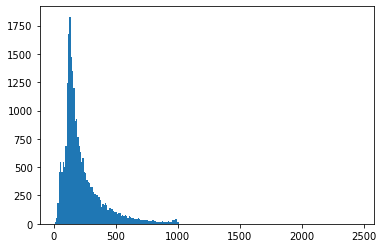

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

_, _, hist = plt.hist(train_df.review.apply(lambda text: len(text.split())), bins='auto')
hist

Кроме этого, нужно перенумеровать как-то слова.

In [121]:
from collections import Counter

words_counter = Counter((word for text in train_df.review for word in text.lower().split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10:
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

Words count 26783


**Задание** Сконвертируйте данные

In [122]:
def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int)
    return data

X_train = convert(train_df.review, word2idx, 1000)
X_test = convert(test_df.review, word2idx, 1000)

<ipython-input-122-27b1b5540537>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.zeros((len(texts), max_text_len), dtype=np.int)
<ipython-input-122-27b1b5540537>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

Поставим учиться модельку на keras.

*Напоминание*: на keras, чтобы обучить модель, нужно
1. Определить модель, например:
```python 
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=NUM_WORDS))
```
2. Задать функцию потерь и оптимизатор:
```python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

3. Запустить обучение:
```python
model.fit(X_train, y_train, 
          batch_size=32,
          epochs=3,
          validation_data=(X_test, y_test))
```

В NLP чаще всего ставятся задачи классификации, поэтому нужно запомнить такие функции потерь:

*   **categorical_crossentropy** - для многоклассовой классификации, в качестве меток должны передаваться one-hot-encoding вектора
*   **sparse_categorical_crossentropy** - аналогично предыдущему, но в качестве меток нужно передавать просто индексы соответствующих классов
*   **binary_crossentropy** - для бинарной классификации


В качестве оптимизатора обычно используют `sgd` или `adam`.


In [123]:
import tensorflow as tf
tf.__version__

'2.9.0-dev20211226'

In [124]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout

In [125]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),

    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          1714112   
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,714,883
Trainable params: 1,714,883
Non-trainable params: 0
______________________________________________

In [126]:
model.fit(X_train, train_df.is_positive, batch_size=128, epochs=10, 
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 39s 182ms/step - loss: 0.5911 - accuracy: 0.7214 - val_loss: 0.3914 - val_accuracy: 0.8388
Epoch 2/10
196/196 [==============================] - 34s 173ms/step - loss: 0.2949 - accuracy: 0.8828 - val_loss: 0.2967 - val_accuracy: 0.8709
Epoch 3/10
196/196 [==============================] - 34s 176ms/step - loss: 0.1806 - accuracy: 0.9345 - val_loss: 0.2948 - val_accuracy: 0.8740
Epoch 4/10
196/196 [==============================] - 34s 172ms/step - loss: 0.1037 - accuracy: 0.9674 - val_loss: 0.3190 - val_accuracy: 0.8710
Epoch 5/10
196/196 [==============================] - 32s 163ms/step - loss: 0.0526 - accuracy: 0.9871 - val_loss: 0.3510 - val_accuracy: 0.8715
Epoch 6/10
196/196 [==============================] - 35s 177ms/step - loss: 0.0234 - accuracy: 0.9964 - val_loss: 0.3889 - val_accuracy: 0.8692
Epoch 7/10
196/196 [==============================] - 34s 172ms/step - loss: 0.0099 - accuracy: 0.9992 - val_loss: 0.4239 - val_ac

**Задание** Подсчитайте качество модели на тесте

In [127]:
  loss, accuracy = model.evaluate(X_test, test_df.is_positive)
  print("Test loss {:.4f}, accuracy {:.2f}%".format(loss, accuracy * 100))

782/782 [==============================] - 11s 14ms/step - loss: 0.4922 - accuracy: 0.8661
Test loss 0.4922, accuracy 86.61%
